# Mid-Term Data Analysis 

link: https://colab.research.google.com/github/jclutian/inf2178-expdesignfordatascience-w23/blob/main/mid-term/Group68/group68_code.ipynb

## EDA part

To answer these three questions, we should focus on three variables, crime type, race, and count to write summary statistics table and plot histograms, as well as explore the relationship among these three. 

The t-test can be conducted to determine whether two groups counts are similar or not.

We can also explore other features, such as year, youth, etc. if we have time and space.

## Method

These two questions will lead to two separable one-way ANOVA tests. If we found p-values for either ANOVA test is smaller than 0.05, we can start doing a post-hoc test to determine which level of the selected variable has a major difference. After that, we can do a two-way ANOVA to figure out whether there is an interaction or not.

## Results and findings

 Show the results from above section. Remember to include an interaction plot in this part.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from tabulate import tabulate
import statsmodels.stats.api as sms


#for multiple comparison ttests
from scipy import stats
import statsmodels.stats.multicomp as mc

# for one-way anova and hsd
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# for two-way anova
import statsmodels.api as sm
from statsmodels.formula.api import ols  

## Dataset

In [ ]:
url = "https://raw.githubusercontent.com/shionguha/inf2178-expdesignfordatascience-w23/main/project%20dataset/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv"
dataset = pd.read_csv(url, delimiter = ",")
dataset

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65271,2021,Oct-Dec,1055609,6044336.0,316123,Indigenous,F,Aged 25 to 34 years,Not a youth,XX,...,1,0,0,0,NaN,NaN,NaN,NaN,NaN,65272
65272,2021,Oct-Dec,1032758,6031692.0,307736,South Asian,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,65273
65273,2021,Oct-Dec,1021067,6064396.0,324057,White,F,Aged 45 to 54 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,65274
65274,2021,Oct-Dec,1008998,6008662.0,331870,Unknown or Legacy,M,Aged 17 years and under,Youth (aged 17 years and under),XX,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,65275


## Data cleaning

In [ ]:
# pick variable of interests
df = dataset[['Arrest_Year','Perceived_Race','Sex','Age_group__at_arrest_','Occurrence_Category','StripSearch']]
df.columns = ['Year','Race','Sex','Age','Crime_Type','Strip']


In [ ]:
# combine some levels of race
df['Race'] = df['Race'].replace('East/Southeast Asian', 'Asian')
df['Race'] = df['Race'].replace('South Asian', 'Asian')
df['Race'] = df['Race'].replace('Middle-Eastern', 'Asian')
df['Race'].value_counts()

<ipython-input-4-e0881cae9f6f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Race'] = df['Race'].replace('East/Southeast Asian', 'Asian')
<ipython-input-4-e0881cae9f6f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Race'] = df['Race'].replace('South Asian', 'Asian')
<ipython-input-4-e0881cae9f6f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

White                27723
Black                17526
Asian                11265
Unknown or Legacy     5056
Indigenous            1934
Latino                1768
Name: Race, dtype: int64

In [ ]:
# combine some levels of Crime_Type that may have similar meanings,
df['Crime_Type'] = df['Crime_Type'].replace('Assault', 'Violent')
df['Crime_Type'] = df['Crime_Type'].replace('Assault & Other crimes against persons', 'Violent')
df['Crime_Type'] = df['Crime_Type'].replace('Robbery & Theft', 'Property')
df['Crime_Type'] = df['Crime_Type'].replace('Warrant', 'Other')
df['Crime_Type'] = df['Crime_Type'].replace('FTA/FTC/Compliance Check/Parollee', 'Other')
df['Crime_Type'] = df['Crime_Type'].replace('Police Category - Administrative', 'Other')
df['Crime_Type'] = df['Crime_Type'].replace('FTA/FTC, Compliance Check & Parollee', 'Other')
df['Crime_Type'] = df['Crime_Type'].replace('Robbery/Theft', 'Property')
df['Crime_Type'] = df['Crime_Type'].replace('Drug Related', 'Other') 
df['Crime_Type'] = df['Crime_Type'].replace('Other Statute & Other Incident Type', 'Other')
df['Crime_Type'] = df['Crime_Type'].replace('Vehicle Related (inc. Impaired)', 'Property')
df['Crime_Type'] = df['Crime_Type'].replace('Other Offence', 'Violent')
df['Crime_Type'] = df['Crime_Type'].replace('Mischief & Fraud', 'Property')
df['Crime_Type'] = df['Crime_Type'].replace('Impaired', 'Property')
df['Crime_Type'] = df['Crime_Type'].replace('Harassment/Threatening', 'Violent')
df['Crime_Type'] = df['Crime_Type'].replace('Mischief', 'Property')
df['Crime_Type'] = df['Crime_Type'].replace('Harassment & Threatening', 'Violent')
df['Crime_Type'] = df['Crime_Type'].replace('Weapons', 'Violent')
df['Crime_Type'] = df['Crime_Type'].replace('Weapons & Homicide', 'Violent')
df['Crime_Type'] = df['Crime_Type'].replace('Other Statute', 'Other')
df['Crime_Type'] = df['Crime_Type'].replace('Break & Enter', 'Property')
df['Crime_Type'] = df['Crime_Type'].replace('Break and Enter', 'Property')
df['Crime_Type'] = df['Crime_Type'].replace('Sexual Related Crime', 'Violent')
df['Crime_Type'] = df['Crime_Type'].replace('Sexual Related Crimes & Crimes Against Children', 'Violent')
df['Crime_Type'] = df['Crime_Type'].replace('Vehicle Related', 'Property')
df['Crime_Type'] = df['Crime_Type'].replace('LLA', 'Other')
df['Crime_Type'] = df['Crime_Type'].replace('Police Category - Incident', 'Other')
df['Crime_Type'] = df['Crime_Type'].replace('Fraud', 'Property')
df['Crime_Type'] = df['Crime_Type'].replace('Mental Health', 'Other')
df['Crime_Type'] = df['Crime_Type'].replace('Homicide', 'Violent')
df['Crime_Type'] = df['Crime_Type'].replace('Crimes against Children', 'Violent')


<ipython-input-5-cd02e515a57b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Crime_Type'] = df['Crime_Type'].replace('Assault', 'Violent')
<ipython-input-5-cd02e515a57b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Crime_Type'] = df['Crime_Type'].replace('Assault & Other crimes against persons', 'Violent')
<ipython-input-5-cd02e515a57b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [ ]:
df['Crime_Type'].value_counts()

Other       23824
Violent     23534
Property    17753
Name: Crime_Type, dtype: int64

In [ ]:
df_res=df.groupby(['Year','Race','Sex','Age','Crime_Type'],as_index=False).count()
df_res.columns = [['Year','Race','Sex','Age','Crime_Type','Count']]
df_res

,Year,Race,Sex,Age,Crime_Type,Count
0,2020,Asian,F,Aged 17 years and younger,Other,18
1,2020,Asian,F,Aged 17 years and younger,Property,38
2,2020,Asian,F,Aged 17 years and younger,Violent,6
3,2020,Asian,F,Aged 18 to 24 years,Other,35
4,2020,Asian,F,Aged 18 to 24 years,Property,74
...,...,...,...,...,...,...
491,2021,White,M,Aged 55 to 64 years,Violent,365
492,2021,White,M,Aged 65 years and older,Other,80
493,2021,White,M,Aged 65 years and older,Property,85
494,2021,White,M,Aged 65 years and older,Violent,129


In [ ]:
df1=df[df.Strip == 1]
a=df1.groupby(['Year','Race','Sex','Age','Crime_Type'],as_index=False).count()
df2=df[df.Strip == 0]
b=df2.groupby(['Year','Race','Sex','Age','Crime_Type'],as_index=False).count()
c=df.groupby(['Year','Race','Sex','Age','Crime_Type'],as_index=False).count()

In [ ]:
d=pd.merge(a, b, how="outer", on=['Year','Race','Sex','Age','Crime_Type'])
df_res = pd.merge(c,d, how="outer", on=['Year','Race','Sex','Age','Crime_Type'])
df_res.columns = ['Year','Race','Sex','Age','Crime_Type','Count','StripYesCount','StripNoCount']
df_res['StripYesCount'] = df_res['StripYesCount'].fillna(0)
df_res['StripNoCount'] = df_res['StripNoCount'].fillna(0)
df_res['Strip_prop'] = df_res['StripYesCount']/df_res['Count']
df_res

,Year,Race,Sex,Age,Crime_Type,Count,StripYesCount,StripNoCount,Strip_prop
0,2020,Asian,F,Aged 17 years and younger,Other,18,2.0,16.0,0.111111
1,2020,Asian,F,Aged 17 years and younger,Property,38,0.0,38.0,0.000000
2,2020,Asian,F,Aged 17 years and younger,Violent,6,0.0,6.0,0.000000
3,2020,Asian,F,Aged 18 to 24 years,Other,35,6.0,29.0,0.171429
4,2020,Asian,F,Aged 18 to 24 years,Property,74,3.0,71.0,0.040541
...,...,...,...,...,...,...,...,...,...
491,2021,White,M,Aged 55 to 64 years,Violent,365,3.0,362.0,0.008219
492,2021,White,M,Aged 65 years and older,Other,80,2.0,78.0,0.025000
493,2021,White,M,Aged 65 years and older,Property,85,0.0,85.0,0.000000
494,2021,White,M,Aged 65 years and older,Violent,129,1.0,128.0,0.007752


## EDA

Race Descriptive Statistics

Text(0, 0.5, 'Strip Search Count')

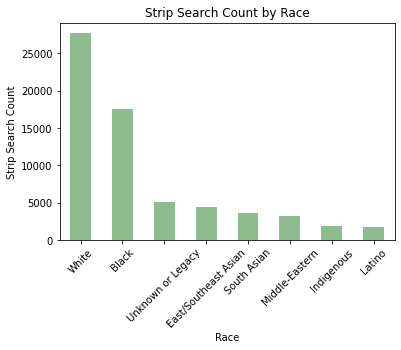

In [ ]:
plot1 = dataset['Perceived_Race'].value_counts().plot(kind ='bar', title = 'Strip Search Count by Race', rot= 45, color = 'darkseagreen')
plot1.set_xlabel("Race")
plot1.set_ylabel("Strip Search Count")

Text(0.5, 0.98, 'Strip Search Counts by Race')

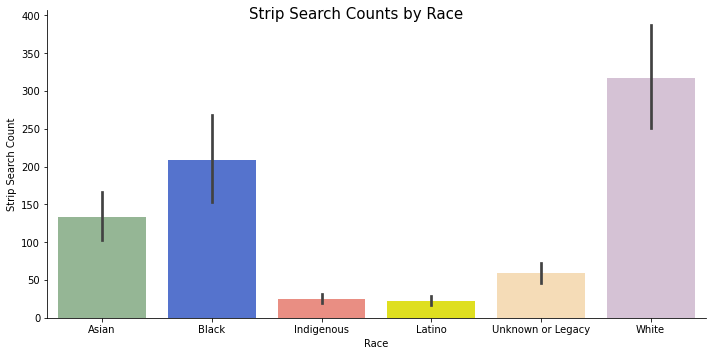

In [ ]:
plot2 = sns.catplot(data=df_res, kind="bar", x="Race", 
                    y="Count", height = 5, aspect = 2,   
                    palette=sns.color_palette (['darkseagreen','royalblue', 'salmon', 'yellow','navajowhite', 'thistle'] ) )
plot2.set_axis_labels('Race', 'Strip Search Count')
plot2.fig.suptitle('Strip Search Counts by Race', fontsize = 15)


Text(0.5, 0.98, 'Proportion of Strip Search by Race')

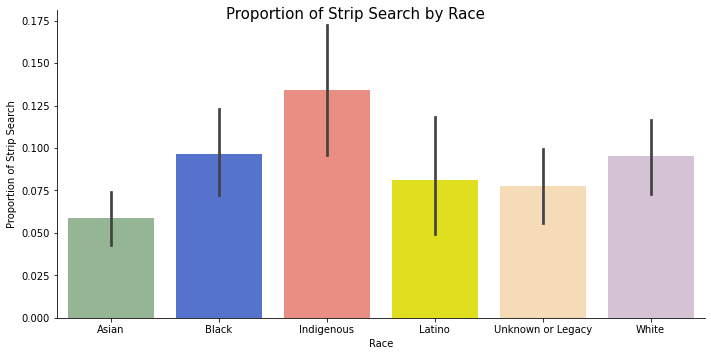

In [ ]:
plot2 = sns.catplot(data=df_res, kind="bar", x="Race", 
                    y="Strip_prop", height = 5, aspect = 2, 
                    palette=sns.color_palette (['darkseagreen','royalblue', 'salmon', 'yellow','navajowhite', 'thistle'] ))
plot2.set_axis_labels('Race', 'Proportion of Strip Search')
plot2.fig.suptitle('Proportion of Strip Search by Race', fontsize = 15)

In [ ]:
#counts means and std
White = df_res[(df_res['Race'] == 'White')]
Unknown = df_res[(df_res['Race'] == 'Unknown or Legacy')]
Black = df_res[(df_res['Race'] == 'Black')]
Latino = df_res[(df_res['Race'] == 'Latino')]
Indigenous = df_res[(df_res['Race'] == 'Indigenous')]
Asian = df_res[(df_res['Race'] == 'Asian')]

race_stat = [Asian, Black, Indigenous, Latino, Unknown, White]
std_race = []
mean_race = []

for i in range (len (df_res['Race'].unique())): 
  std_race.append(race_stat[i]['Count'].std())
  mean_race.append (race_stat[i]['Count'].mean() )

#combine them together to become a dataframe 
df_race = pd.DataFrame ({'Race': df_res['Race'].unique(), 'Mean': mean_race, "Std": std_race})

print(tabulate(df_race.round(2), headers='keys', tablefmt='psql'))


+----+-------------------+--------+--------+
|    | Race              |   Mean |    Std |
|----+-------------------+--------+--------|
|  0 | Asian             | 133.71 | 153.85 |
|  1 | Black             | 208.18 | 259.63 |
|  2 | Indigenous        |  25.34 |  27.03 |
|  3 | Latino            |  22.27 |  28.11 |
|  4 | Unknown or Legacy |  58.65 |  64.8  |
|  5 | White             | 317.64 | 338.46 |
+----+-------------------+--------+--------+


In [ ]:
#proportion means and std

race_stat = [Asian, Black, Indigenous, Latino, Unknown, White]
std_prop_race = []
mean_prop_race = []
sum_race = []
count_race = []

for i in range (len (df_res['Race'].unique())): 
  std_prop_race.append(race_stat[i]['Strip_prop'].std())
  mean_prop_race.append (race_stat[i]['Strip_prop'].mean() )
  sum_race.append (race_stat[i]['StripYesCount'].sum())
  count_race.append (race_stat[i]['Count'].sum())

#combine them together to become a dataframe 
df_prop_race = pd.DataFrame ({'Race': df_res['Race'].unique(), 'Mean Proportion': mean_prop_race, 
                              "Std Proportion": std_prop_race,
                              'Strip Searches per Race': sum_race, 'Total Arrests': count_race})

print(tabulate(df_prop_race.round(3), headers='keys', tablefmt='psql'))

+----+-------------------+-------------------+------------------+---------------------------+-----------------+
|    | Race              |   Mean Proportion |   Std Proportion |   Strip Searches per Race |   Total Arrests |
|----+-------------------+-------------------+------------------+---------------------------+-----------------|
|  0 | Asian             |             0.058 |            0.073 |                       826 |           11232 |
|  1 | Black             |             0.096 |            0.114 |                      2434 |           17487 |
|  2 | Indigenous        |             0.134 |            0.179 |                       306 |            1926 |
|  3 | Latino            |             0.081 |            0.162 |                       132 |            1759 |
|  4 | Unknown or Legacy |             0.077 |            0.106 |                       535 |            5044 |
|  5 | White             |             0.095 |            0.106 |                      3566 |           

Crime_Type Descriptive Statistics 

Text(0, 0.5, 'Strip Search Count')

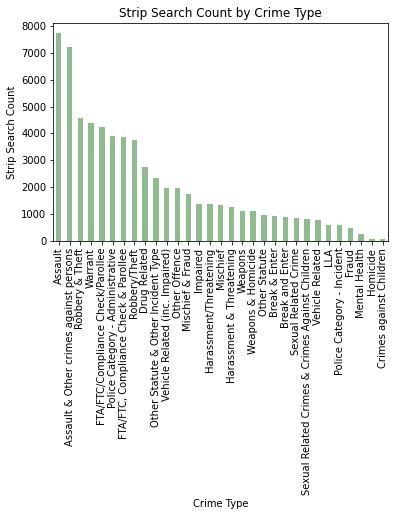

In [ ]:
plot5 = dataset['Occurrence_Category'].value_counts().plot(kind= 'bar', rot = 90, title = 'Strip Search Count by Crime Type',color = 'darkseagreen')
plot5.set_xlabel("Crime Type")
plot5.set_ylabel("Strip Search Count")

Text(0.5, 0.98, 'Proportion of Strip Search by Crime Type')

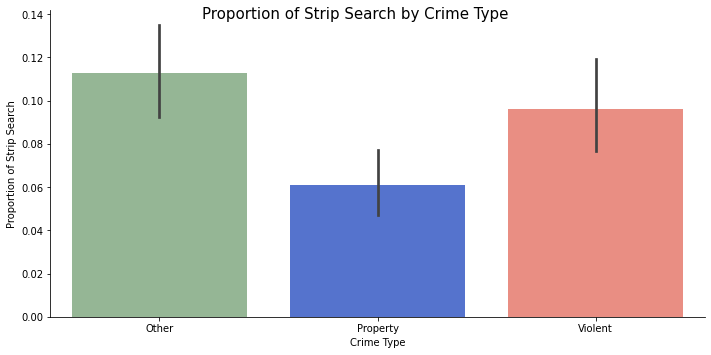

In [ ]:
plot3= sns.catplot(data=df_res, kind="bar", x="Crime_Type", y="Strip_prop", height = 5, 
                   aspect = 2, 
                   palette=sns.color_palette (['darkseagreen','royalblue', 'salmon'] ) )

plot3.set_axis_labels('Crime Type', 'Proportion of Strip Search')
plot3.fig.suptitle('Proportion of Strip Search by Crime Type', fontsize = 15)

In [ ]:
#mean and standard deviations

Other = df_res[(df_res['Crime_Type'] == 'Other')]
Property = df_res[(df_res['Crime_Type'] == 'Property')]
Violent = df_res[(df_res['Crime_Type'] == 'Violent')]

crime_stat = [Other, Property, Violent]
std_crime = []
mean_crime = []
sum_crime = []
count_crime = []
for i in range (len (df_res['Crime_Type'].unique())): 
  std_crime.append(crime_stat[i]['Strip_prop'].std())
  mean_crime.append (crime_stat[i]['Strip_prop'].mean())
  sum_crime.append (crime_stat[i]['StripYesCount'].sum())
  count_crime.append (crime_stat[i]['Count'].sum())

#combine them together to become a dataframe 


df_crime = pd.DataFrame ({'Crime Type': df_res['Crime_Type'].unique(), 
                          'Mean': mean_crime, "Std": std_crime,
                          'Total Strip Searches': sum_crime,
                          'Total Arrests:': count_crime})

print(tabulate(df_crime.round(3), headers='keys', tablefmt='psql'))


+----+--------------+--------+-------+------------------------+------------------+
|    | Crime Type   |   Mean |   Std |   Total Strip Searches |   Total Arrests: |
|----+--------------+--------+-------+------------------------+------------------|
|  0 | Other        |  0.113 | 0.138 |                   3401 |            23806 |
|  1 | Property     |  0.061 | 0.097 |                   1714 |            17748 |
|  2 | Violent      |  0.096 | 0.142 |                   2684 |            23529 |
+----+--------------+--------+-------+------------------------+------------------+


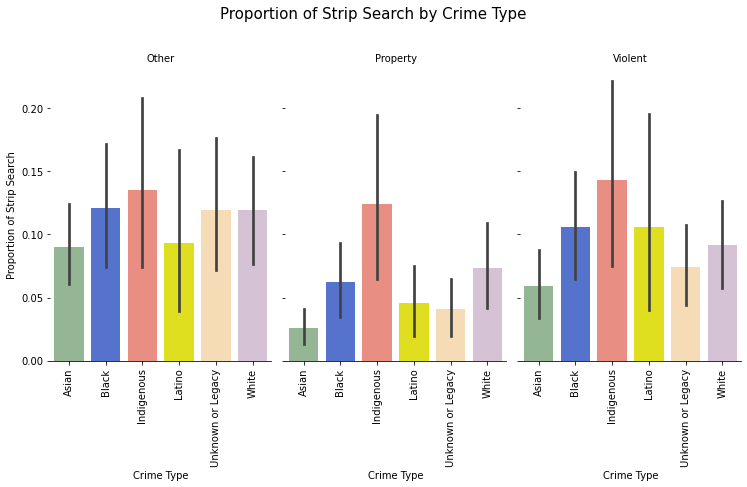

In [ ]:
#grouped by race showing crime type 
plot4 = sns.catplot (kind = 'bar', data = df_res, x = 'Race',
                    y = 'Strip_prop', col= 'Crime_Type',                      
                    height = 5 ,aspect = 0.7, 
                    palette=sns.color_palette (['darkseagreen','royalblue', 'salmon', 'yellow','navajowhite', 'thistle']))


plot4.set_axis_labels('Crime Type', 'Proportion of Strip Search')
plot4.set_xticklabels(rotation=90)
plot4.fig.suptitle('Proportion of Strip Search by Crime Type', fontsize = 15,y=1.1)
plot4.set_titles("{col_name}")
plot4.despine(left=True)

### Histogram for `Count`

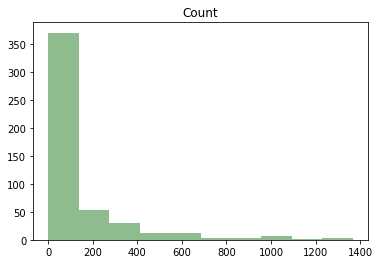

In [ ]:
#plt.hist(df_res['Count'])
#plt.show() 

ax = df_res.hist(column = 'Count', grid = False, color = 'darkseagreen' )


### T-tests

Testing for assumptions using Welch's Test. Because the data is not necessarily continous, it might not show that it passes all assumptions. 

t-tests for **race**

In [ ]:
#Race Shapiro-Wilk; Test for Normalization 
shapiro_table = []
for i in range (len (df_res['Race'].unique())):
  temp = stats.shapiro (race_stat[i]['Strip_prop'])
  sig = "Accept"
  if temp[1] < 0.05: 
    sig = "Reject"
  shapiro_table.append ([temp[0], temp[1], sig])

shapiro_table = pd.DataFrame (shapiro_table)
shapiro_table.insert(0, 'Race',df_res['Race'].unique())
shapiro_table.columns = ['Race','Statistic', 'P-Value', 'H0']
print ("Test of Data Normalization for Race Groups:","\n",tabulate (shapiro_table, headers = 'keys', tablefmt='psql'))

Test of Data Normalization for Race Groups: 
 +----+-------------------+-------------+-------------+--------+
|    | Race              |   Statistic |     P-Value | H0     |
|----+-------------------+-------------+-------------+--------|
|  0 | Asian             |    0.791636 | 1.4847e-09  | Reject |
|  1 | Black             |    0.785485 | 1.0037e-09  | Reject |
|  2 | Indigenous        |    0.770801 | 1.52535e-09 | Reject |
|  3 | Latino            |    0.56353  | 5.78918e-14 | Reject |
|  4 | Unknown or Legacy |    0.760972 | 1.63082e-10 | Reject |
|  5 | White             |    0.804897 | 2.26113e-09 | Reject |
+----+-------------------+-------------+-------------+--------+


As expected, all the race groups do not have a normalized distribution 

In [ ]:
#ttest

race_comp = mc.MultiComparison(df_res['Strip_prop'],df_res['Race'])
summary, p_val, p_val_corr =race_comp.allpairtest(stats.ttest_ind, method= "bonf")

print (summary)


Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.00, alphacBonf=0.003
      group1            group2        stat   pval  pval_corr reject
-------------------------------------------------------------------
            Asian             Black -2.5462 0.0118     0.177  False
            Asian        Indigenous -3.5664 0.0005    0.0072   True
            Asian            Latino -1.1677 0.2447       1.0  False
            Asian Unknown or Legacy -1.3512 0.1784       1.0  False
            Asian             White -2.6097 0.0099    0.1481  False
            Black        Indigenous -1.6235 0.1065       1.0  False
            Black            Latino  0.6841 0.4949       1.0  False
            Black Unknown or Legacy  1.1073 0.2697       1.0  False
            Black             White  0.0657 0.9477       1.0  False
       Indigenous            Latino  1.9386 0.0544    0.8158  False
       Indigenous Unknown or Legacy  2.4919 0.0137    0.2059  False
       Indigenous      

In [ ]:
df_res['Race'].value_counts()

White                87
Unknown or Legacy    86
Asian                84
Black                84
Latino               79
Indigenous           76
Name: Race, dtype: int64

t-tests for crime type 

In [ ]:
#Crime Shapiro-Wilk; Test for Normalization 
shapiro_table = []
for i in range (len (df_res['Race'].unique())):
  temp = stats.shapiro (race_stat[i]['Strip_prop'])
  sig = "Accept"
  if temp[1] < 0.05: 
    sig = "Reject"
  shapiro_table.append ([temp[0], temp[1], sig])

shapiro_table = pd.DataFrame (shapiro_table)
shapiro_table.insert(0, 'Race',df_res['Race'].unique())
shapiro_table.columns = ['Race','Statistic', 'P-Value', 'H0']
print ("Test of Data Normalization for Race Groups:","\n",tabulate (shapiro_table, headers = 'keys', tablefmt='psql'))

Test of Data Normalization for Race Groups: 
 +----+-------------------+-------------+-------------+--------+
|    | Race              |   Statistic |     P-Value | H0     |
|----+-------------------+-------------+-------------+--------|
|  0 | Asian             |    0.791636 | 1.4847e-09  | Reject |
|  1 | Black             |    0.785485 | 1.0037e-09  | Reject |
|  2 | Indigenous        |    0.770801 | 1.52535e-09 | Reject |
|  3 | Latino            |    0.56353  | 5.78918e-14 | Reject |
|  4 | Unknown or Legacy |    0.760972 | 1.63082e-10 | Reject |
|  5 | White             |    0.804897 | 2.26113e-09 | Reject |
+----+-------------------+-------------+-------------+--------+


In [ ]:
#ttest

crime_comp = mc.MultiComparison(df_res['Strip_prop'],df_res['Crime_Type'])
summary1, p_val1, p_val_corr1 = crime_comp.allpairtest(stats.ttest_ind, method= "bonf")
print (summary1)

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.02, alphacBonf=0.017
 group1   group2   stat   pval  pval_corr reject
------------------------------------------------
   Other Property 3.9657 0.0001    0.0003   True
   Other  Violent 1.0884 0.2772    0.8316  False
Property  Violent -2.648 0.0085    0.0255   True
------------------------------------------------


## One-way ANOVA

In [ ]:
## ANOVA on Race vs. Strip_prop
a = df_res[df_res.Race=='Black'].Strip_prop
b = df_res[df_res.Race=="White"].Strip_prop
c = df_res[df_res.Race=="Asian"].Strip_prop

d = df_res[df_res.Race=="Latino"].Strip_prop
e = df_res[df_res.Race=="Indigenous"].Strip_prop
f = df_res[df_res.Race=="Unknown or Legacy"].Strip_prop
# perform one-way ANOVA
f_oneway(a,b,c,d,e,f)

F_onewayResult(statistic=3.1966970023564545, pvalue=0.0075126486729193715)

In [ ]:
# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=df_res['Strip_prop'],
                          groups=df_res['Race'],
                          alpha=0.05)

#display results
print(tukey)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
      group1            group2      meandiff p-adj   lower  upper  reject
-------------------------------------------------------------------------
            Asian             Black   0.0377  0.391 -0.0184 0.0938  False
            Asian        Indigenous   0.0759 0.0025  0.0183 0.1334   True
            Asian            Latino   0.0228 0.8485 -0.0342 0.0797  False
            Asian Unknown or Legacy    0.019    0.9 -0.0368 0.0747  False
            Asian             White   0.0366 0.4162  -0.019 0.0922  False
            Black        Indigenous   0.0382 0.4061 -0.0194 0.0957  False
            Black            Latino  -0.0149    0.9 -0.0719  0.042  False
            Black Unknown or Legacy  -0.0187    0.9 -0.0745  0.037  False
            Black             White  -0.0011    0.9 -0.0567 0.0545  False
       Indigenous            Latino  -0.0531 0.0986 -0.1115 0.0053  False
       Indigenous Unknown or Legacy  -

In [ ]:
a = df_res[df_res.Crime_Type=='Violent'].Strip_prop
b = df_res[df_res.Crime_Type=="Property"].Strip_prop
c = df_res[df_res.Crime_Type=="Other"].Strip_prop
f_oneway(a,b,c)

F_onewayResult(statistic=7.194189184672411, pvalue=0.0008323931809533964)

In [ ]:
# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=df_res['Strip_prop'],
                          groups=df_res['Crime_Type'],
                          alpha=0.05)

#display results
print(tukey)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj   lower  upper  reject
-------------------------------------------------------
   Other Property  -0.0519  0.001 -0.0848 -0.019   True
   Other  Violent  -0.0167 0.4567 -0.0496 0.0161  False
Property  Violent   0.0352 0.0314  0.0025 0.0679   True
-------------------------------------------------------


## Two-way ANOVA

In [ ]:
# two-way anova
model = ols('Strip_prop ~ C(Race) + C(Crime_Type) + C(Race):C(Crime_Type)', data=df_res).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Race),0.257399,5.0,3.230002,0.007039
C(Crime_Type),0.231017,2.0,7.247340,0.000793
C(Race):C(Crime_Type),0.057601,10.0,0.361408,0.962479
Residual,7.618384,478.0,NaN,NaN


## Interaction plot

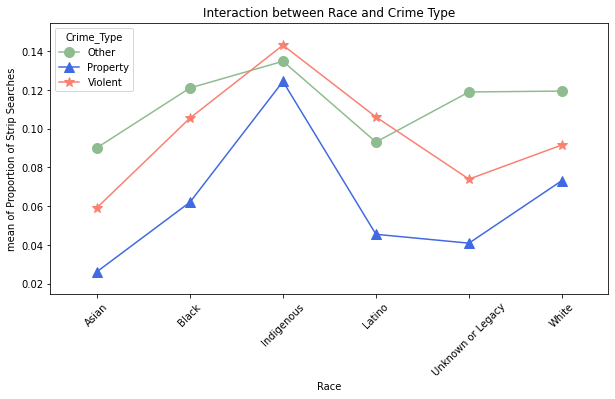

In [ ]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))
 
plt.xticks (rotation = 45)
plt.title("Interaction between Race and Crime Type")

fig = interaction_plot(x=df_res['Race'], trace=df_res['Crime_Type'], response=df_res['Strip_prop'], 
                       colors=['darkseagreen','royalblue', 'salmon'], 
                       ylabel = 'Proportion of Strip Searches', markers=["o", "^", "*"],ax = ax, ms = 10)

  

plt.show()
